############################################################################################

################## -- Programa de Especialización en Data Science Nivel II --##########################

############################################################################################

Modelos de Clasificación : Máquinas de Soporte Vectorial

Autores : José Cárdenas - André Chávez 

## Guía de Modelamiento de Información

#### 1 LIBRERÍAS A UTILIZAR

In [2]:
# Primer Curso de ML
#Importar las librerías necesarias en Python.
import pandas as pd ## Manejo de dataframes o set de datos
%matplotlib inline
import matplotlib.pyplot as plt2 ## Todo lo referente a gráficas y demás.
import matplotlib as plt
import numpy as np ## Todo lo referente a trabajar con vectores y matrices
from scipy import stats ## Herramientas y algoritmos matemáticos para python
import seaborn as sns # Se basa en Matplotlib y la complementa en el tema de graficos y demás.

#### 2 EXTRAYENDO LA DATA

In [3]:
train = pd.read_csv("C:/Users/Andre Chavez/Desktop/Datos/train.csv") 
# Leer el dataset en un dataframe usando pandas

In [4]:
#Leer los primeros registros.
train.head(5) # Puedes visualizar la cantidad de registro que requieras

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### 3 EXPLORACION DE LA DATA

#### Recurso: https://www.analyticsvidhya.com/blog/2014/07/statistics/

In [5]:
train.describe() #Resumen de la información

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


La función describe () proporcionaría count - conteo o número de elementos, mean - media, standard deviation (std) - desviación estándar, min - mínimo, cuartiles y max - máximo en su salida. Sólo considera las variables en formato de número.

#### Aquí hay algunas conclusiones

1. LoanAmount tiene (614 – 592) 22 valores perdidos.
2. Loan_Amount_Term tiene (614 – 600) 14 valores perdidos.
3. Credit_History tiene (614 – 564) 50 valores perdidos.
4. Nosotros podemos también observar que cerca del 84% de los solicitantes al préstamo tienen un historial crediticio. ¿Cómo? La media del campo Credit_History es 0.84 (Recordemos, Credit_History tiene o toma el valor 1 para aquellos que tienen historial crediticio y 0 en caso contrario).
5. La variable ApplicantIncome parece estar en línea con las espectativas al igual que CoapplicantIncome.

In [6]:
# Tabla Resumen
train.describe(include='all') # Describir todas las variables.

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001864,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [7]:
# Gráficos para variables cuantitativas
#Histogramas y Cajas

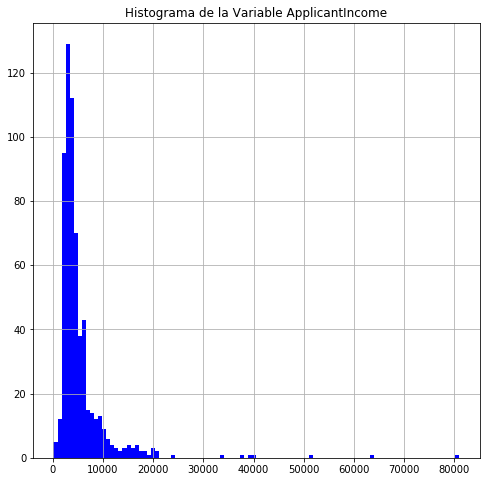

In [8]:
# Análisis Univariado de los atributos del data set
%matplotlib inline
import matplotlib.pyplot as plt
plt.title('Histograma de la Variable ApplicantIncome')
train['ApplicantIncome'].hist(figsize=(8,8),color="blue",bins=100)

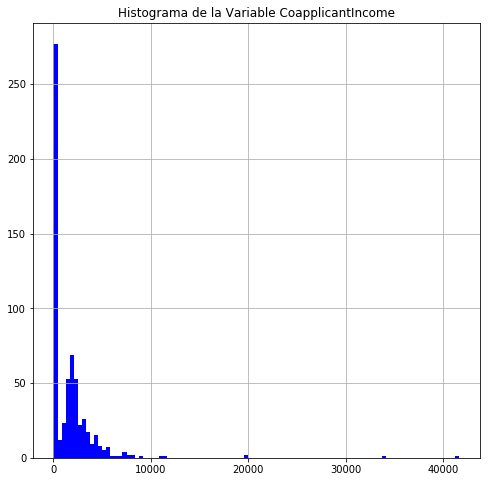

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title('Histograma de la Variable CoapplicantIncome')
train['CoapplicantIncome'].hist(figsize=(8,8),color="blue",bins=100)

### Cuartiles y diagramas de cajas

Los cuartiles son los tres valores de la variable estadística que dividen a un conjunto de datos ordenados en cuatro partes iguales. Q1, Q2 y Q3 determinan los valores correspondientes al 25%, al 50% y al 75% de los datos. Q2 coincide con la mediana.

Los diagramas de cajas son una presentación visual que describe varias características importantes al mismo tiempo, tales como la dispersión y simetría. Para su realización se representan los tres cuartiles y los valores mínimo y máximo de los datos, sobre un rectángulo, alineado horizontal o verticalmente. Estos gráficos nos proporcionan abundante información y son sumamente útiles para encontrar valores atípicos y comparar dos conjunto de datos.



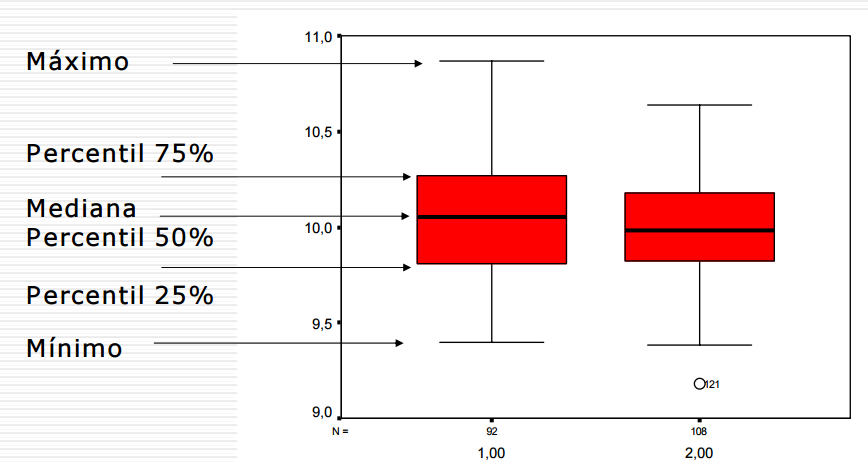

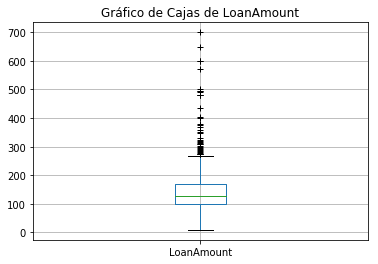

In [10]:
# Gráfico de Cajas
plt.title('Gráfico de Cajas de LoanAmount')
train.boxplot(column='LoanAmount',showfliers='T',notch=0, sym='+', vert=1, whis=1.5)

C:\Users\Andre Chavez\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


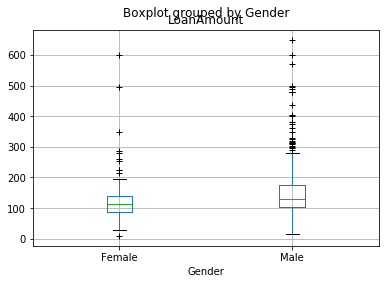

In [11]:
train.boxplot(column='LoanAmount',showfliers='T',notch=0, sym='+', vert=1, whis=1.5,by='Gender')

#### 4 IMPUTACION DE LA DATA

In [12]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())

#Aplicamos por columna:
print ("Valores perdidos por columna")
print (train.apply(num_missing, axis=0)) # Axis = 0 es vertical , axis =1 horizontal.

Valores perdidos por columna
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [13]:
# Particionando la data en Numéricos (Variables Cuantitativas) y Factores (Variables Cualitativas)

In [14]:
# Recodificando y convirtiendo las variables de acuerdo a nuestro criterio
# Data de Entrenamiento
train['Dependents'] = train['Dependents'].replace({'0': 1,'1': 2, '2': 3, '3+': 4})
train['Gender'] = train['Gender'].replace({'Female': 1,'Male': 2})
train['Married'] = train['Married'].replace({'No': 1,'Yes': 2})
train['Self_Employed'] = train['Self_Employed'].replace({'No': 1,'Yes': 2})
train['Education'] = train['Education'].replace({'Graduate': 1,'Not Graduate': 2})
train['Credit_History'] = train['Credit_History'].replace({0: 1,1: 2})
train['Property_Area'] = train['Property_Area'].replace({'Rural': 1, 'Semiurban': 2, 'Urban': 3})
train['Loan_Status'] = train['Loan_Status'].replace({'N': 0,'Y': 1})

In [15]:
# Revisamos si la recodigicación fue la idónea
train.describe(include='all') 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601.000000,611.000000,599.000000,614.000000,582.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,614.000000
unique,614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,LP001864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.813644,1.651391,1.762938,1.218241,1.140893,5403.459283,1621.245798,146.412162,342.00000,1.842199,2.037459,0.687296
std,NaN,0.389718,0.476920,1.015216,0.413389,0.348211,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.787482,0.463973
min,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,150.000000,0.000000,9.000000,12.00000,1.000000,1.000000,0.000000
25%,NaN,2.000000,1.000000,1.000000,1.000000,1.000000,2877.500000,0.000000,100.000000,360.00000,2.000000,1.000000,0.000000
50%,NaN,2.000000,2.000000,1.000000,1.000000,1.000000,3812.500000,1188.500000,128.000000,360.00000,2.000000,2.000000,1.000000
75%,NaN,2.000000,2.000000,3.000000,1.000000,1.000000,5795.000000,2297.250000,168.000000,360.00000,2.000000,3.000000,1.000000


In [16]:
# Recodificando y convirtiendo las variables de acuerdo a nuestro criterio
# Data de Test
test = pd.read_csv("C:/Users/Andre Chavez/Desktop/Datos/test.csv") # Leer el dataset en un dataframe usando pandas
test['Dependents'] = test['Dependents'].replace({'0': 1,'1': 2, '2': 3, '3+': 4})
test['Gender'] = test['Gender'].replace({'Female': 1,'Male': 2})
test['Married'] = test['Married'].replace({'No': 1,'Yes': 2})
test['Self_Employed'] = test['Self_Employed'].replace({'No': 1,'Yes': 2})
test['Education'] = test['Education'].replace({'Graduate': 1,'Not Graduate': 2})
test['Credit_History'] = test['Credit_History'].replace({0: 1,1: 2})
test['Property_Area'] = test['Property_Area'].replace({'Rural': 1, 'Semiurban': 2, 'Urban': 3})

In [17]:
# Revisamos si la recodigicación fue la idónea
test.describe(include='all') 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,367,356.000000,367.000000,357.000000,367.000000,344.000000,367.000000,367.000000,362.000000,361.000000,338.000000,367.000000
unique,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,LP001959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.803371,1.634877,1.829132,1.228883,1.107558,4805.599455,1569.577657,136.132597,342.537396,1.825444,2.079019
std,NaN,0.398009,0.482122,1.071302,0.420687,0.310273,4910.685399,2334.232099,61.366652,65.156643,0.380150,0.824337
min,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,28.000000,6.000000,1.000000,1.000000
25%,NaN,2.000000,1.000000,1.000000,1.000000,1.000000,2864.000000,0.000000,100.250000,360.000000,2.000000,1.000000
50%,NaN,2.000000,2.000000,1.000000,1.000000,1.000000,3786.000000,1025.000000,125.000000,360.000000,2.000000,2.000000
75%,NaN,2.000000,2.000000,3.000000,1.000000,1.000000,5060.000000,2430.500000,158.000000,360.000000,2.000000,3.000000


In [18]:
# Creamos un copia del dataset original para poder realizar las imputaciones
# Imputacion del Data train
train_parametrica=train.copy()
train_parametrica.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,2.0,1.0,1.0,1,1.0,5849,0.0,NaN,360.0,2.0,3,1
1,LP001003,2.0,2.0,2.0,1,1.0,4583,1508.0,128.0,360.0,2.0,1,0
2,LP001005,2.0,2.0,1.0,1,2.0,3000,0.0,66.0,360.0,2.0,3,1
3,LP001006,2.0,2.0,1.0,2,1.0,2583,2358.0,120.0,360.0,2.0,3,1
4,LP001008,2.0,1.0,1.0,1,1.0,6000,0.0,141.0,360.0,2.0,3,1


In [19]:
# Imputación Paramétrica
# Para variables cuantitativas se puede usar medias o medianas, para las cualitativas moda.
# Imputamos por las moda todas las variables cualitativas
from scipy.stats import mode

for column in ['Gender', 'Married', 'Self_Employed', 'Credit_History','Dependents']:
    train_parametrica[column] = train_parametrica[column].fillna(train_parametrica[column].mode()[0])

# Imputamos por las moda todas las variables cuantitativas

for column in ['LoanAmount', 'Loan_Amount_Term']:
    train_parametrica[column] = train_parametrica[column].fillna(train_parametrica[column].mean())    

In [20]:
train_parametrica.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,1.817590,1.653094,1.744300,1.218241,1.133550,5403.459283,1621.245798,146.412162,342.000000,1.855049,2.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.352339,0.787482,0.463973
min,1.000000,1.000000,1.000000,1.000000,1.000000,150.000000,0.000000,9.000000,12.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,2877.500000,0.000000,100.250000,360.000000,2.000000,1.000000,0.000000
50%,2.000000,2.000000,1.000000,1.000000,1.000000,3812.500000,1188.500000,129.000000,360.000000,2.000000,2.000000,1.000000
75%,2.000000,2.000000,2.000000,1.000000,1.000000,5795.000000,2297.250000,164.750000,360.000000,2.000000,3.000000,1.000000
max,2.000000,2.000000,4.000000,2.000000,2.000000,81000.000000,41667.000000,700.000000,480.000000,2.000000,3.000000,1.000000


In [21]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())

#Aplicamos por columna:
print ("Valores perdidos por columna")
print (train_parametrica.apply(num_missing, axis=0)) 

Valores perdidos por columna
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [22]:
# Imputacion del Data Test
test_parametrica=test.copy()
test_parametrica.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,2.0,2,1.0,1,1.0,5720,0,110.0,360.0,2.0,3
1,LP001022,2.0,2,2.0,1,1.0,3076,1500,126.0,360.0,2.0,3
2,LP001031,2.0,2,3.0,1,1.0,5000,1800,208.0,360.0,2.0,3
3,LP001035,2.0,2,3.0,1,1.0,2340,2546,100.0,360.0,NaN,3
4,LP001051,2.0,1,1.0,2,1.0,3276,0,78.0,360.0,2.0,3


In [23]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())
#Aplicamos por columna:
print ("Valores perdidos por columna")
print (test_parametrica.apply(num_missing, axis=0)) 

Valores perdidos por columna
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [24]:
# Imputación Paramétrica
# Para variables cuantitativas se puede usar medias o medianas, para las cualitativas moda.
# Imputamos por las moda todas las variables cualitativas
from scipy.stats import mode

for column in ['Gender', 'Married', 'Self_Employed', 'Credit_History','Dependents']:
    test_parametrica[column] = test_parametrica[column].fillna(test_parametrica[column].mode()[0])
    
# Imputamos por las moda todas las variables cuantitativas
for column in ['LoanAmount', 'Loan_Amount_Term']:
    test_parametrica[column] = test_parametrica[column].fillna(test_parametrica[column].median())  

#### 5 CREACION Y TRANSFORMACION DE VARIABLES

##### Creación de Variables Paramétricamente o por Decisión de Negocio

In [25]:
# También conocido como proceso de Feature Engineering, no olvidar que todo lo que le hacemos al Train o Entrenamiento se lo
# debemos hacer a la data de test.

In [26]:
#Creación de variables a partir de las definidas
import numpy as np
import pandas as pd

#Creamos las variables para el entrenamiento o train
train_parametrica['TotalIncome'] = train_parametrica['ApplicantIncome'] + train_parametrica['CoapplicantIncome']
train_parametrica['LoanAmount_Log'] = round(np.log(train_parametrica['LoanAmount']),2)
train_parametrica['AmountxTerm']=round(train_parametrica['LoanAmount']/train_parametrica['Loan_Amount_Term'],2)

#Creamos las variables para la validación o test


test_parametrica['TotalIncome'] = test_parametrica['ApplicantIncome'] + test_parametrica['CoapplicantIncome']
test_parametrica['LoanAmount_Log'] = round(np.log(test_parametrica['LoanAmount']),2)
test_parametrica['AmountxTerm']=round(test_parametrica['LoanAmount']/test_parametrica['Loan_Amount_Term'],2)


In [27]:
# Revisamos las variables creadas, derrepente queremos crear algunas más?
train_parametrica.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,LoanAmount_Log,AmountxTerm
0,LP001002,2.0,1.0,1.0,1,1.0,5849,0.0,146.412162,360.0,2.0,3,1,5849.0,4.99,0.41
1,LP001003,2.0,2.0,2.0,1,1.0,4583,1508.0,128.000000,360.0,2.0,1,0,6091.0,4.85,0.36


In [28]:
# Le quitamos la variable Loan_ID o identificador único para poder modelar la información 
train_parametrica = train_parametrica.drop('Loan_ID', axis=1)

In [29]:
# Partición Muestral de la Información
# Creación de la data de train y la data de test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_parametrica.drop('Loan_Status', axis=1), 
                                                    train_parametrica['Loan_Status'], test_size=0.30,
                                                    stratify=train_parametrica['Loan_Status'],
                                                   random_state=100)

In [30]:
# Concatenamos las covariables y la variable dependiente del train para poder balancearlo
train_Xy = pd.concat([X_train, y_train], axis=1)

In [31]:
# Puedo corroborar que en mi data de train sigo teniendo el desbalance
train_Xy.Loan_Status.value_counts()

1    295
0    134
Name: Loan_Status, dtype: int64

#### 6 BALANCEO DE LOS DATOS Y SELECCIÓN DE DRIVERS

## Remuestreo

Una técnica ampliamente adoptada para tratar conjuntos de datos altamente desequilibrados se llama remuestreo. Consiste en eliminar muestras de la clase mayoritaria (submuestreo o undersampling) y / o agregar más ejemplos de la clase minoritaria (sobremuestreo o oversampling).



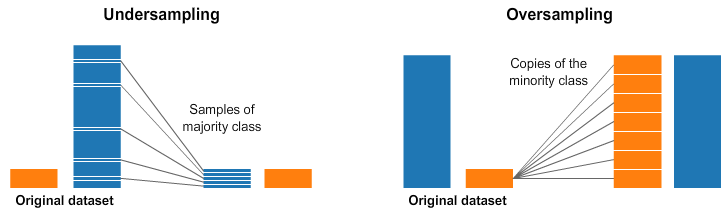

In [32]:
train_Xy.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,LoanAmount_Log,AmountxTerm,Loan_Status
544,1.0,2.0,1.0,2,1.0,3017,663.0,102.0,360.0,2.0,2,3680.0,4.62,0.28,1
13,2.0,1.0,1.0,1,1.0,1853,2840.0,114.0,360.0,2.0,1,4693.0,4.74,0.32,0
383,2.0,1.0,1.0,1,2.0,7167,0.0,128.0,360.0,2.0,3,7167.0,4.85,0.36,1


Clase 0: 134
Clase 1: 295
Proportion Clase 0: 0.31 : 0
Proportion Clase 1: 0.69 : 1


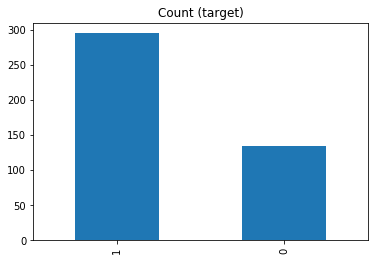

In [33]:
## Podemos hacer el balanceo de manera artesanal , para entender las lógicas.

import numpy as np
import pandas as pd
import seaborn as sns

target_count = train_Xy.Loan_Status.value_counts()
print('Clase 0:', target_count[0])
print('Clase 1:', target_count[1])

print('Proportion Clase 0:', round(target_count[0] / (target_count[0]+target_count[1]), 2), ': 0')
print('Proportion Clase 1:', round(target_count[1] / (target_count[0]+target_count[1]), 2), ': 1')


target_count.plot(kind='bar', title='Count (target)');



In [34]:
# Conteo de las Clases
# La clase 1 es la de los préstamos otorgados , tenemos 422 préstamos otorgados
# La clase 0 es la de los préstamos no otorgados , tenemos 192 préstamos no otorgados
count_class_1,count_class_0 = train_Xy.Loan_Status.value_counts()

# Dividimos las Clases
df_class_0 = train_Xy[train_Xy['Loan_Status'] == 0]
df_class_1 = train_Xy[train_Xy['Loan_Status'] == 1]

## Podemos visualizar el contenido del objeto df_class_1.head(5)

#### Undersampling o sub-muestreo

Random under-sampling:
1    134
0    134
Name: Loan_Status, dtype: int64


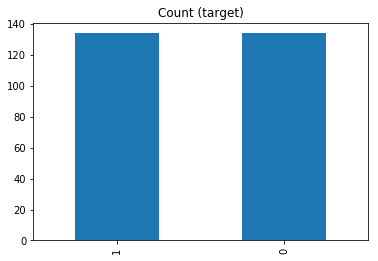

In [35]:
# Definimos una nueva variable llamada df_class_1_under la cual nos da un muestreo de la clase 1 dependiendo del número de 
# elementos de la clase 0.
df_class_1_under = df_class_1.sample(count_class_0)
df_balanceado_under = pd.concat([df_class_1_under, df_class_0], axis=0)

print('Random under-sampling:')
print(df_balanceado_under.Loan_Status.value_counts())

df_balanceado_under.Loan_Status.value_counts().plot(kind='bar', title='Count (target)');

#### Oversampling o sobre-muestreo

Random over-sampling:
1    295
0    295
Name: Loan_Status, dtype: int64


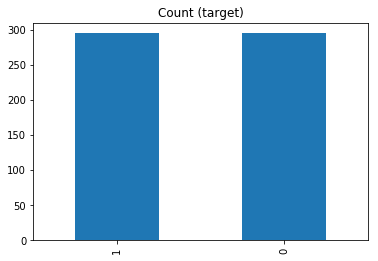

In [36]:
# Leemos la lógica : Del dataset de la clase 0 , sacamos una muestra de tamaño 422 con reemplazo.
df_class_0_over = df_class_0.sample(count_class_1, replace=True)
df_balanceado_over = pd.concat([df_class_1, df_class_0_over], axis=0)

print('Random over-sampling:')
print(df_balanceado_over.Loan_Status.value_counts())

df_balanceado_over.Loan_Status.value_counts().plot(kind='bar', title='Count (target)');



## Selección de Drivers

### Selección de Drivers Mediante Técnicas de Machine Learning - Random Forest

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import tree

In [38]:
# Dividimos el dataset en X e y
X_over=df_balanceado_over.drop('Loan_Status',axis=1)
y_over=df_balanceado_over['Loan_Status']

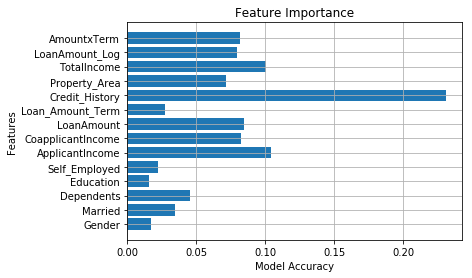

In [39]:
# Ajustamos un modelo , puede ser Random Forest
extree = ExtraTreesClassifier()
extree.fit(X_over, y_over)

# Mostramos o guardamos la importancia relativa
relval = extree.feature_importances_

# Graficamos la importancia relativa de las variables
pos = np.arange(14) + 0.5
plt.barh(pos, relval, align='center')
plt.title("Feature Importance")
plt.xlabel("Model Accuracy")
plt.ylabel("Features")
plt.yticks(pos, X_over.columns)
plt.grid(True)


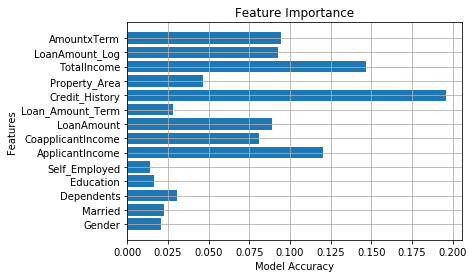

In [40]:
from sklearn.ensemble import RandomForestClassifier as RFC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

forest = RFC(n_jobs=2,n_estimators=50)
forest.fit(X_over, y_over)
importances = forest.feature_importances_


# horizontal bar plot of feature importance
pos = np.arange(14) + 0.5
plt.barh(pos, importances, align='center')
plt.title("Feature Importance")
plt.xlabel("Model Accuracy")
plt.ylabel("Features")
plt.yticks(pos, X_over.columns)
plt.grid(True)


#### 7 MODELADO DE LA DATA

In [41]:
# Data Final : df_balanceado_smt pueden elegir cualquiera resultado del producto de un método de balanceo
import pandas as pd
from matplotlib import pyplot as plt

In [42]:
# Creación de la data de train, separando o haciendo un split de nuestra información
X_train = X_over.loc[:,['Credit_History','TotalIncome','ApplicantIncome','LoanAmount','AmountxTerm']]
y_train = y_over

In [43]:
# Creación de la data de test, separando o haciendo un split de nuestra información
X_test = X_test.loc[:,['Credit_History','TotalIncome','ApplicantIncome','LoanAmount','AmountxTerm']]

In [44]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(590, 5) (590,)
(185, 5) (185,)


#### Modelos Supervisados : SVM

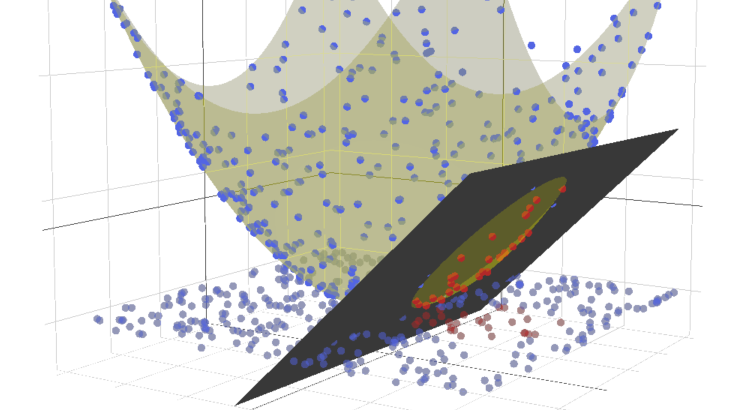

In [65]:
from sklearn import svm
# Parámetros disponibles:
# Kernel disponibles en Python ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’ 
# degree : Opcional , por defecto 3,se usa para el Kernel Polinomial.
# gamma : Coeficiente de Kernel para 'rbf', 'poly' y 'sigmoid'. Si gamma es 'auto', entonces se usarán 1 / n° features en su lugar.
# shrinking : Contracción de parámetros, por defecto es T
# tol : Tolerancia para el criterio de parada.
# random_state : Semilla aleatoria 
# Demora así que tener cuidado
# C es el parámetro de regularización
svc = svm.SVC(kernel='linear', C=1,cache_size=10000)
svc.fit(X_train, y_train)

SVC(C=0.05, cache_size=10000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [58]:
#Calculamos la clase predicha, para poder evaluar la clasificación
y_pred = svc.predict(X_test)

In [59]:
# Validamos los resultados
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)
print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.600

	Precision: 0.768
	Recall: 0.598
	F1: 0.673



In [60]:
# Obtenemos la matriz de confusión con las métricas anteriores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.41      0.60      0.49        58
          1       0.77      0.60      0.67       127

avg / total       0.65      0.60      0.61       185



#### Podemos probar con otros tipos de kernel 

In [61]:
# Kernel sistema de base radial 
svm_rbf = svm.SVC(kernel='rbf', gamma=0.7, C=0.05)

In [62]:
# Kernel polinomial, con grado =2
svm_poly = svm.SVC(kernel='poly', degree=2, C=0.05)

In [64]:
# Kernel sigmoideo
svm_poly = svm.SVC(kernel='sigmoid', C=0.05)

In [ ]:
# Después de probar el mejor Kernel para la data propuesta , podemos puntuar nuestros resultados.

In [ ]:
#Le quitamos el ID para poder scorear o puntuar el modelo
scorear = test_parametrica.copy()

In [ ]:
#Creamos una copia para no perder el dataset de test o validación ya imputado
y_final = svc.predict(scorear) # Predecimos sobre nuevos clientes o clientes sin la variable dependiente VD
data = np.hstack((test_parametrica['Loan_ID'].values.reshape(-1,1), y_final.reshape(-1,1)))
df_submmit = pd.DataFrame(data, columns=['Loan_ID','Loan_Status'])
df_submmit['Loan_Status']=["Y" if i == 1 else "N" for i in df_submmit['Loan_Status']]
df_submmit.to_csv('Submmit_SVM001.csv', index=False)